In [3]:
import json
import pandas as pd

# Load all JSON files
with open('conflic_points.json') as f:
    conflict_points = json.load(f)

with open('ego_goal_locations.json') as f:
    ego_goal_locations = json.load(f)

with open('ego_start_locations.json') as f:
    ego_start_locations = json.load(f)

with open('other_goal_locations.json') as f:
    other_goal_locations = json.load(f)

with open('other_start_locations.json') as f:
    other_start_locations = json.load(f)

with open('run_results.json') as f:
    run_results = json.load(f)

with open('weather_states.json') as f:
    weather_states = json.load(f)

# Combine all data into rows
data = []
for i in range(len(conflict_points)):
    row = {
        "PathInteraction": conflict_points[i]["conflict_point"],
        "GoalEgo": ego_goal_locations[i]["ego_goal_location"],
        "WindIntensity": weather_states[i]["weather_states"]["wind_intensity"],
        "RoadFriction": weather_states[i]["weather_states"]["friction"],
        "FogDistance": weather_states[i]["weather_states"]["fog_distance"],
        "StartOther": other_start_locations[i]["other_start_location"],
        "PrecipitationDeposits": weather_states[i]["weather_states"]["precipitation_deposits"],
        "Cloudiness": weather_states[i]["weather_states"]["cloudiness"],
        "FogDensity": weather_states[i]["weather_states"]["fog_density"],
        "GoalOther": other_goal_locations[i]["other_goal_location"],
        "Precipitation": weather_states[i]["weather_states"]["precipitation"],
        "Wetness": weather_states[i]["weather_states"]["wetness"],
        "StartEgo": ego_start_locations[i]["ego_start_location"],
        "CollisionOccurred": run_results[i]["collision_occurred"]
    }
    data.append(row)

# Create DataFrame
df = pd.DataFrame(data)

In [4]:
df

,PathInteraction,GoalEgo,WindIntensity,RoadFriction,FogDistance,StartOther,PrecipitationDeposits,Cloudiness,FogDensity,GoalOther,Precipitation,Wetness,StartEgo,CollisionOccurred
0,c2,left,20.0,0.4,0.0,right,0.0,40.0,0.0,left,80.0,20.0,base,False
1,c4,right,40.0,1.0,20.0,right,80.0,100.0,60.0,base,0.0,20.0,left,True
2,c2,left,0.0,0.6,0.0,base_left_lane,0.0,100.0,100.0,left,0.0,40.0,right,False
3,c1,right,80.0,0.1,80.0,left,0.0,60.0,100.0,right,100.0,20.0,base,False
4,c2,left,0.0,0.1,20.0,right,20.0,20.0,60.0,base,20.0,40.0,base,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,c4,base,20.0,1.0,40.0,right,0.0,0.0,40.0,base,20.0,40.0,left,True
644,c2,base,60.0,0.4,80.0,base_left_lane,20.0,0.0,60.0,left,20.0,80.0,right,False
645,c2,left,100.0,0.1,100.0,right,100.0,60.0,80.0,left,100.0,20.0,base,False
646,c2,base,20.0,0.8,60.0,base_left_lane,60.0,40.0,0.0,left,100.0,80.0,right,False


### Finding and dropping duplicates

In [3]:
# Find and drop duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
if num_duplicates > 0:
    print(f"Number of duplicate rows removed: {num_duplicates}")
    df = df.drop_duplicates()
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [4]:
# Save to Excel
df.to_excel("combined_results_sitcov_approach.xlsx", index=False)

### Filtering only rows that lead to collision

In [5]:
# Filter only rows where a collision occurred
collision_df = df[df["CollisionOccurred"] == True]

# Save collision-only DataFrame to a new Excel file
collision_df.to_excel("collision_only_results.xlsx", index=False)

print(f"Number of collision rows saved: {len(collision_df)}")

Number of collision rows saved: 99


### Filtering only rows that have StartOther = base_left_lane

In [5]:
# Filter only rows where a collision occurred
base_left_lane_df = df[df["StartOther"] == "base_left_lane"]

# Save base_left_lane-only DataFrame to a new Excel file
base_left_lane_df.to_excel("base_left_lane_only_results.xlsx", index=False)

print(f"Number of base_left_lane rows saved: {len(base_left_lane_df)}")

Number of base_left_lane rows saved: 137


### Filtering only rows that lead to collision in base_left_lane

In [7]:
# Filter only rows where a collision occurred
base_left_lane_collision_df = base_left_lane_df[base_left_lane_df["CollisionOccurred"] == True]

# Save collision-only DataFrame to a new Excel file
base_left_lane_collision_df.to_excel("base_left_lane_collision_only_results.xlsx", index=False)

print(f"Number of collision rows saved: {len(base_left_lane_collision_df)}")

Number of collision rows saved: 24


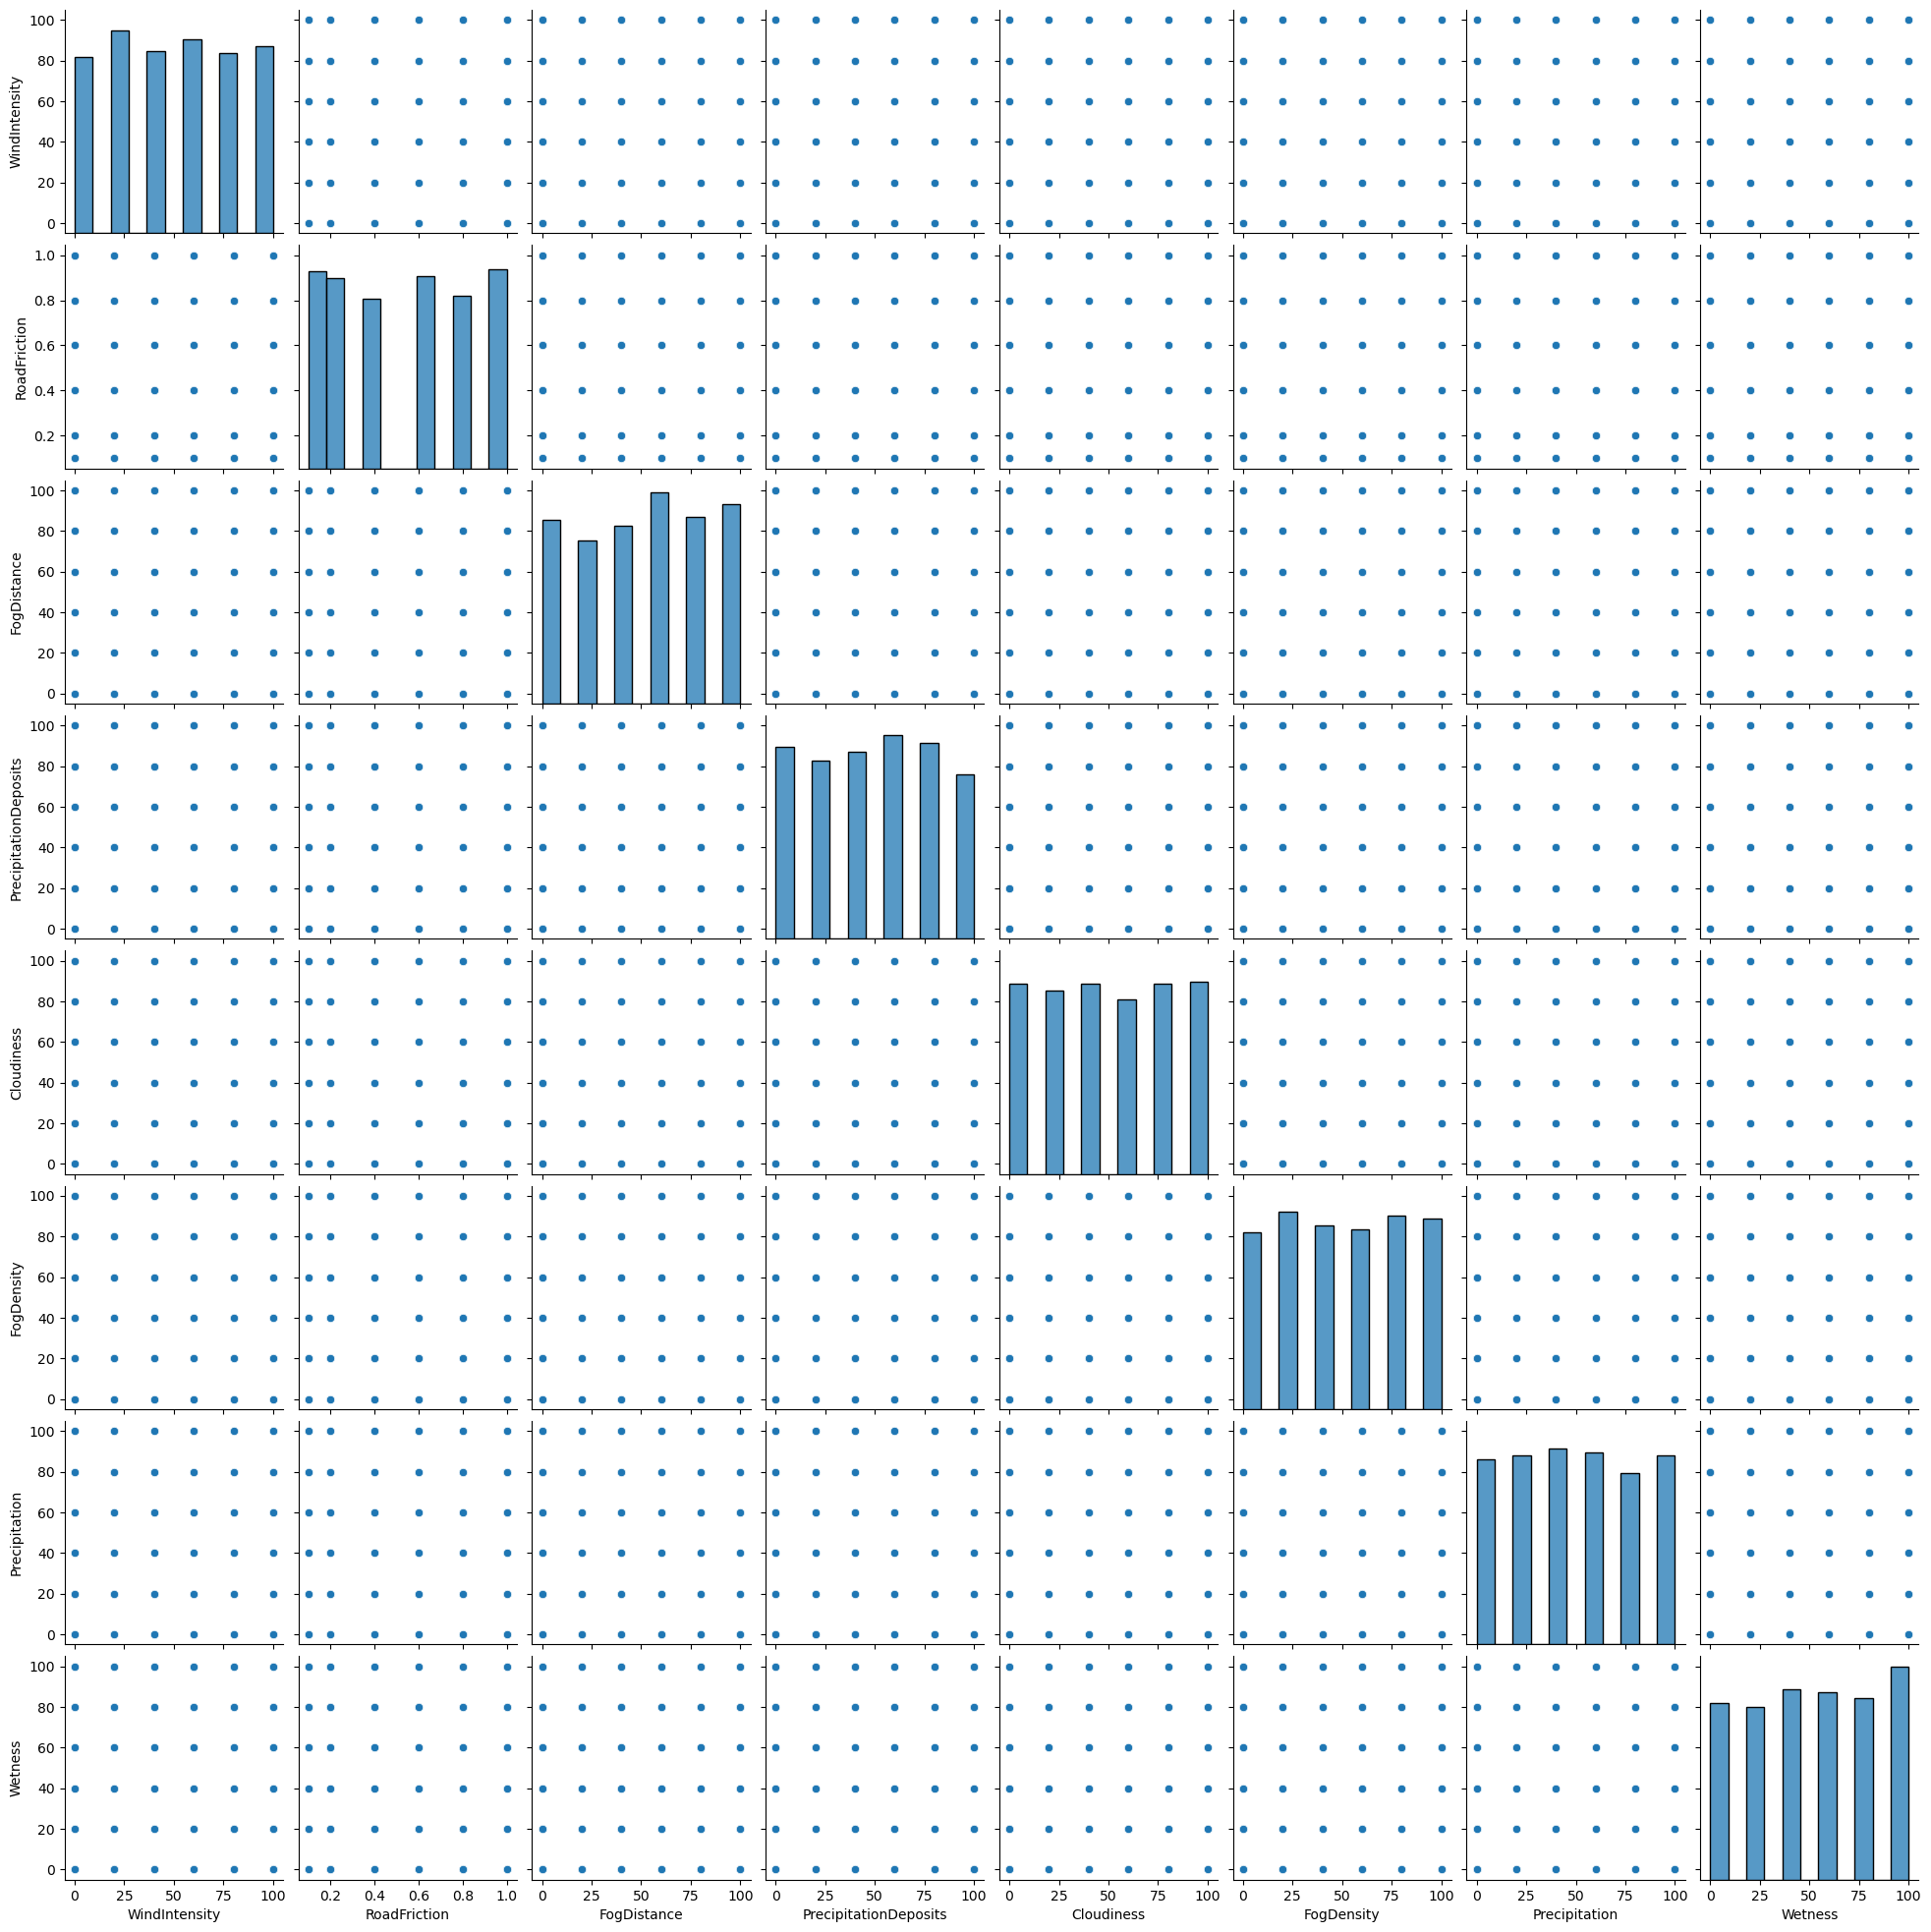

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel("combined_results_sitcov_approach.xlsx", engine="openpyxl")

# Drop the specified columns
columns_to_remove = ["PathInteraction", "CollisionOccurred"]
df_reduced = df.drop(columns=columns_to_remove)

# Plot the pair plot
sns.pairplot(df_reduced)
plt.show()

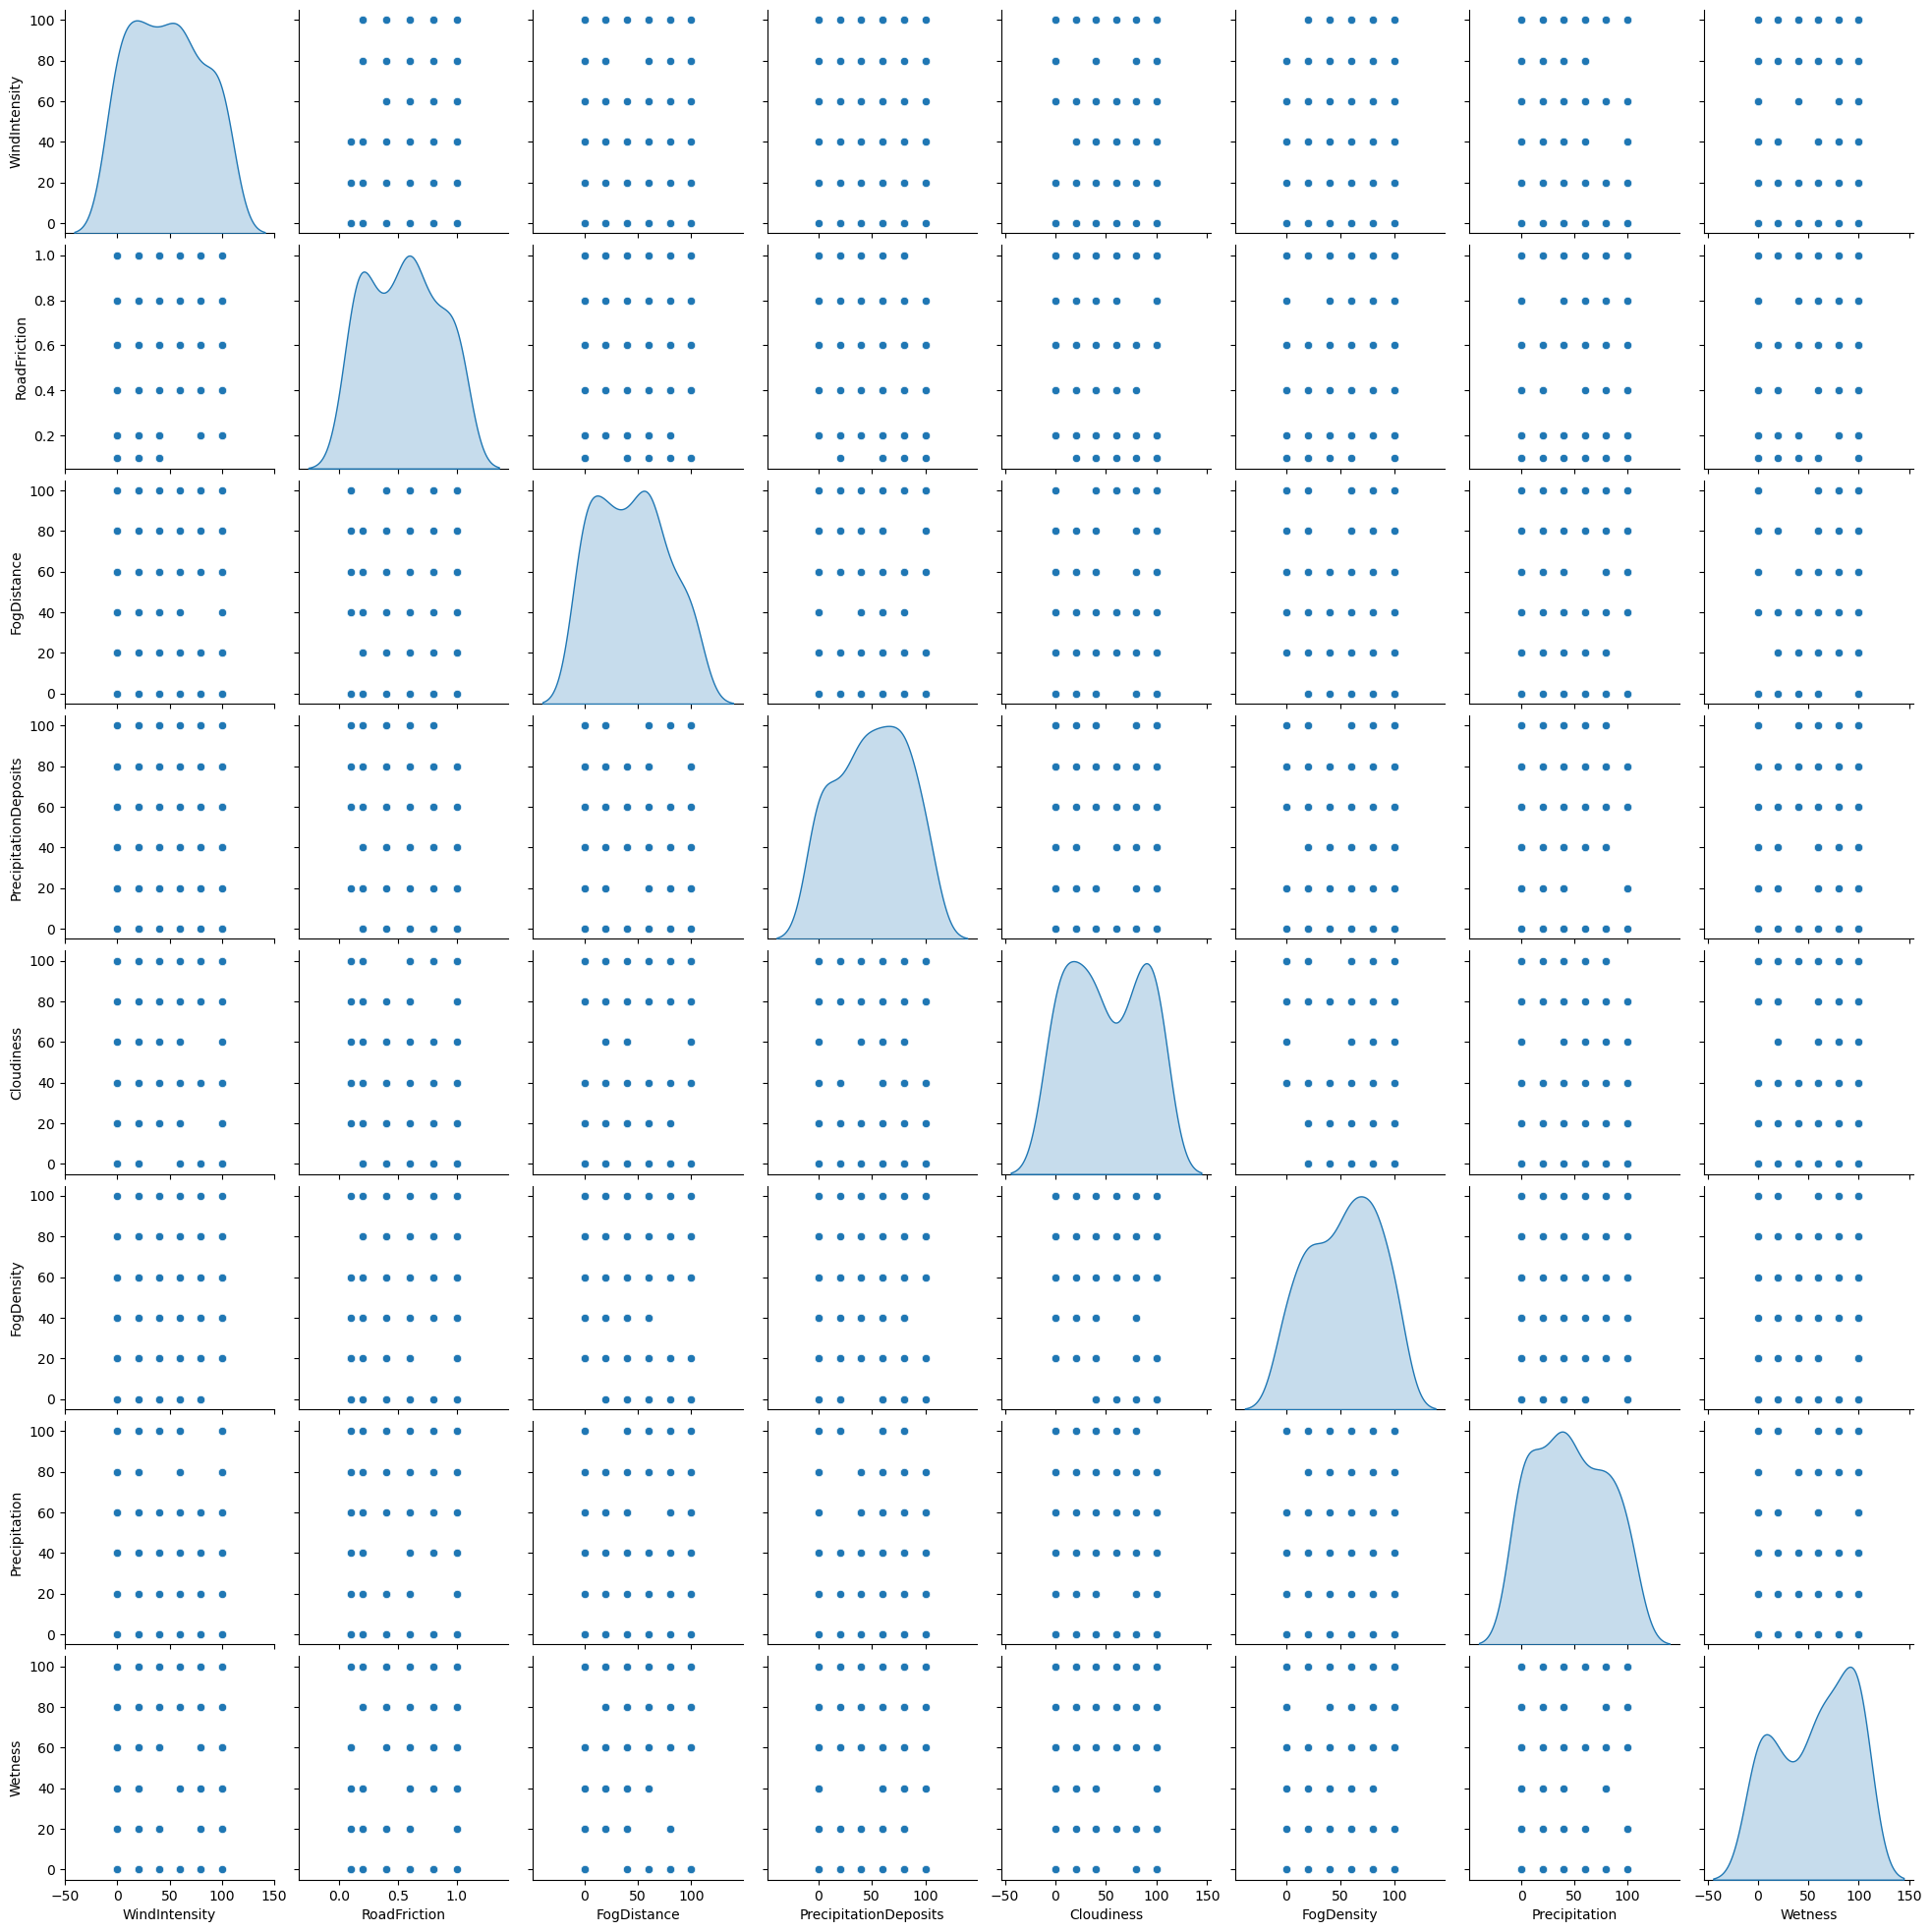

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel("collision_only_results.xlsx", engine="openpyxl")

# Drop the specified columns
columns_to_remove = ["PathInteraction", "CollisionOccurred"]
df_reduced = df.drop(columns=columns_to_remove)

# Plot the pair plot
sns.pairplot(df_reduced, diag_kind="kde")
plt.show()